<a href="https://colab.research.google.com/github/ligueproleo/Foundation_Trilogy/blob/main/C%C3%B3pia_de_Desafio_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataH Internship Program 2024-2025**

# **Alunos:**
## - João Paulo Cardoso.
## - Leonardo Alves Pereira.
## - Rosemeri Borges.

# **Desafio 3 - Projeto de Classificação de Candlesticks**

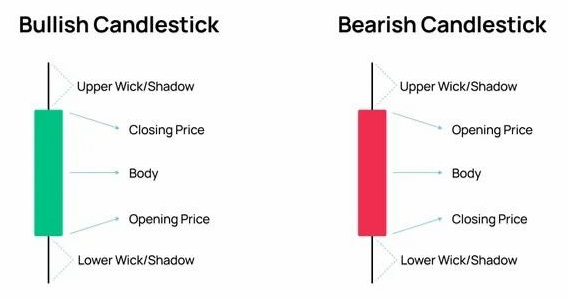


## **1. Introdução**


Os candlesticks, também conhecidos como velas japonesas, são uma ferramenta
gráfica amplamente utilizada na análise técnica de mercados financeiros, como
ações, moedas e commodities. Desenvolvidos no Japão no século XVIII, eles oferecem uma representação visual detalhada do movimento de preços de um ativo em um determinado período de tempo.

Cada candlestick fornece quatro informações essenciais: o preço de abertura, o preço de fechamento, o preço máximo e o preço mínimo. Através da interpretação dos padrões formados pelos candlesticks, traders e investidores podem identificar tendências e potenciais pontos de reversão no mercado, auxiliando na tomada de decisões informadas de compra ou venda.

Este projeto visa a classificação automática de candlesticks utilizando técnicas de aprendizado não supervisionado. Os candlesticks são amplamente utilizados em análises de mercado financeiro para identificar tendências e reversões. Nosso objetivo é identificar padrões similares em candles por meio de algoritmos de clusterização, visualizando os resultados por meio de gráficos interativos e verificando a eficácia dos clusters com métricas de avaliação como o Silhouette Score.



## **2. Objetivo**

- Classificar automaticamente candlesticks com base em características como corpo, sombra superior e inferior.

- Avaliar a eficiência dos clusters formados utilizando métodos quantitativos e visuais, como gráficos 2D, 3D e gráficos de candlestick interativos.

- Aplicar técnicas de validação como o Método Elbow e o Silhouette Score para determinar o número ideal de clusters.

- Explorar a viabilidade de automatizar a identificação de padrões para auxiliar traders na tomada de decisões.



## **3. Implementação**

### **A) Preparação do Dataset**

In [ ]:
# Instalação das bibliotecas
#!pip install numpy pandas plotly

In [ ]:
# Importação das bibliotecas
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Exemplo de leitura do arquivo caso seja em formato CSV (ajuste conforme o tipo do arquivo)
# Baixar e carregar o dataset no dataframe
url = 'https://docs.google.com/spreadsheets/d/1mp8oSZjKtJcURz3O5v0Dp5a3LODKR8bGrgpmrQxVksg/export?format=csv'
df = pd.read_csv(url)

In [ ]:
# Verificar valores ausentes
missing_values = df.isnull().sum()

In [ ]:
# Ordenar o DataFrame em ordem crescente de data
df = df.sort_values(by='Date', ascending=True)

In [ ]:
# Exibir as colunas do dataframe
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Exibir 5 primeiras rows do dataframe
df.head()

,Date,Open,High,Low,Close
5043,2002-05-23,1.156429,1.242857,1.145714,1.196429
5042,2002-05-24,1.214286,1.225000,1.197143,1.210000
5041,2002-05-28,1.213571,1.232143,1.157143,1.157143
5040,2002-05-29,1.164286,1.164286,1.085714,1.103571
5039,2002-05-30,1.107857,1.107857,1.071429,1.071429


### **B) Exploração Inicial**

In [ ]:
# Configurar o índice de data se houver uma coluna de data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# Gráfico interativo de candlestick
# The 'data' argument should be a list containing the go.Candlestick trace
fig = go.Figure(data=[go.Candlestick(x=df.index,

                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     name='Candlestick')])

# Atualizar o layout do gráfico
fig.update_layout(title='Gráfico de Candlestick',
                  xaxis_title='Data',
                  yaxis_title='Preço',
                  xaxis_rangeslider_visible=False)

fig.show()

In [ ]:
# Adicionar uma coluna indicando se o candlestick é bullish ou bearish
df['Type'] = df.apply(lambda row: 'Bullish' if row['Close'] > row['Open'] else 'Bearish', axis=1)

# Contar quantos são bullish e quantos são bearish
type_counts = df['Type'].value_counts()

# Exibir o número de candlesticks bullish e bearish
print("Contagem de candlesticks:")
print(type_counts)


Contagem de candlesticks:
Type
Bearish    2580
Bullish    2464
Name: count, dtype: int64


## Comentátios

### Analisando o aspecto geral do gráfico de ações, nota-se que há uma consistência com a evolução da Netflix de 2002 a 2024, exemplificando um caso de inovação, adaptação ao mercado e estratégias que moldaram a empresa, o preço das ações e a percepção de valor dos investidores.

### 1. IPO e Primeiros Anos (2002–2010)

### IPO em 2002
- A Netflix abriu seu capital em 2002, com ações negociadas a um preço inicial modesto. Nessa época, a empresa era um serviço de aluguel de DVDs por correspondência.
Crescimento Estável: Nos anos seguintes, a empresa expandiu sua base de clientes gradualmente, à medida que o serviço de aluguel de DVDs ganhou popularidade.

### Início do Streaming (2007)
- A introdução do streaming em 2007 representou um ponto de inflexão. O mercado de streaming ainda era novo, mas a Netflix foi pioneira, o que contribuiu para um crescimento de valor das ações à medida que investidores perceberam o potencial do streaming.

### 2. Expansão e Auge do Streaming (2011–2019)

### Expansão Internacional (2010–2016)
- A partir de 2010, a Netflix começou sua expansão internacional, lançando seu serviço em dezenas de países, o que impulsionou ainda mais o valor das ações. Em 2016, o serviço estava disponível praticamente no mundo todo.

- Investimento em Conteúdo Original (2013 em diante): Em 2013, a Netflix lançou “House of Cards”, seu primeiro grande sucesso original. Esse investimento em conteúdo exclusivo diferenciou a empresa de outros serviços e aumentou seu apelo para assinantes, levando a um crescimento significativo nas ações.

- Alta Contínua e Valor Recorde: De 2013 a 2019, o preço das ações da Netflix viu uma valorização extraordinária, com investidores apostando fortemente no modelo de streaming e no sucesso de conteúdos originais. O valor das ações aumentou com a adição constante de novos assinantes e o crescimento das receitas.

### 3. Pandemia e Crescimento Acelerado (2020–2021)

### Aumento Excepcional com a Pandemia (2020)
- Durante a pandemia de COVID-19, o streaming se tornou um serviço essencial para entretenimento em casa. Em 2020, as ações da Netflix subiram drasticamente, atingindo novos recordes de valor, impulsionadas por um aumento de assinantes em todo o mundo.

- Alto Valorizado: A valorização durante esse período foi em grande parte devido à alta demanda e ao crescimento do mercado de streaming, já que cinemas e entretenimento ao vivo estavam indisponíveis.

### 4. Concorrência Intensa e Ajustes (2022 em diante)

### Saturação do Mercado de Streaming
- Em 2022, com o mercado de streaming mais saturado e concorrentes como Disney+, HBO Max e Amazon Prime Video disputando uma parcela do público, a Netflix começou a enfrentar um crescimento mais lento.

- Perda de Assinantes: A empresa reportou sua primeira perda significativa de assinantes em anos. Esse fato impactou o preço das ações, e a Netflix precisou reavaliar sua estratégia, considerando ajustes como um plano mais acessível com anúncios e melhorias na experiência de usuário.

- Recuperação e Sustentabilidade: Recentemente, a Netflix tem focado em aumentar o valor para o acionista com uma oferta de serviços diversificada, incluindo produções locais e medidas para reduzir o compartilhamento de contas. A volatilidade permanece, mas a empresa parece encontrar um equilíbrio com ajustes de modelo de receita.



### **C) Definição das Variáveis**

In [ ]:
# 1. Altura da Vela (High - Low): Volatilidade dentro do período
df['altura'] = df['High'] - df['Low']

# 2. Corpo do Candlestick (Open - Close): A força do movimento do preço
df['corpo'] = abs(df['Close'] - df['Open'])

# 3. Sombra Superior: Indica rejeição de preços altos
df['sombra_superior'] = df['High'] - df[['Open', 'Close']].max(axis=1)

# 4. Sombra Inferior: Mostra rejeição de preços baixos
df['sombra_inferior'] = df[['Open', 'Close']].min(axis=1) - df['Low']

# 5. Relação Corpo / Altura Total: Força relativa do corpo em relação à volatilidade
df['relacao_corpo_altura'] = df['corpo'] / (df['altura'] + 1e-6)  # 1e-6 para evitar divisão por zero

# 6. Razão entre Abertura e Fechamento de Velas Consecutivas
# Captura a continuidade ou reversão entre as velas - sinaliza força ou fraqueza contínua
df['razao_abertura_fechamento'] = df['Open'].shift(-1) / df['Close']

# 7. Tamanho do Gap entre Fechamento Anterior e Abertura Atual
# Avaliar como o sentimento de mercado se alterou entre dois períodos consecutivos
# Sinais de rompimento de suporte/resistência
df['gap'] = df['Open'] - df['Close'].shift(1)

# Exibir as primeiras linhas para ver as novas colunas com os cálculos
print(df[['Open', 'Close', 'High', 'Low', 'altura', 'corpo', 'sombra_superior', 'sombra_inferior', 'relacao_corpo_altura', 'razao_abertura_fechamento', 'gap']].head())


                Open     Close      High       Low    altura     corpo  \
Date                                                                     
2002-05-23  1.156429  1.196429  1.242857  1.145714  0.097143  0.040000   
2002-05-24  1.214286  1.210000  1.225000  1.197143  0.027857  0.004286   
2002-05-28  1.213571  1.157143  1.232143  1.157143  0.075000  0.056428   
2002-05-29  1.164286  1.103571  1.164286  1.085714  0.078572  0.060715   
2002-05-30  1.107857  1.071429  1.107857  1.071429  0.036428  0.036428   

            sombra_superior  sombra_inferior  relacao_corpo_altura  \
Date                                                                 
2002-05-23         0.046428         0.010715              0.411760   
2002-05-24         0.010714         0.012857              0.153852   
2002-05-28         0.018572         0.000000              0.752363   
2002-05-29         0.000000         0.017857              0.772721   
2002-05-30         0.000000         0.000000              0.9

### **D) Refinamento das Variáveis**

In [ ]:
# Verificar se há valores ausentes no DataFrame
print("Valores ausentes por coluna antes do tratamento:\n", df.isnull().sum())

# Preencher valores NaN com a média da coluna (ou você pode optar por .dropna())
df.dropna(inplace=True)

# Verificar novamente se os valores ausentes foram preenchidos
print("Valores ausentes por coluna após o tratamento:\n", df.isnull().sum())

Valores ausentes por coluna antes do tratamento:
 Open                         0
High                         0
Low                          0
Close                        0
Type                         0
altura                       0
corpo                        0
sombra_superior              0
sombra_inferior              0
relacao_corpo_altura         0
razao_abertura_fechamento    1
gap                          1
dtype: int64
Valores ausentes por coluna após o tratamento:
 Open                         0
High                         0
Low                          0
Close                        0
Type                         0
altura                       0
corpo                        0
sombra_superior              0
sombra_inferior              0
relacao_corpo_altura         0
razao_abertura_fechamento    0
gap                          0
dtype: int64


In [ ]:
# Seleção dos atributos e escalonamento dos dados
features = ['altura', 'corpo', 'sombra_superior', 'sombra_inferior',
            'relacao_corpo_altura', 'razao_abertura_fechamento', 'gap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

### **E) Modelagem da Clusterização**

### E.1) Definição do número de clusters e algoritmo

### Pesquisando clusters com método cotovelo e silhueta

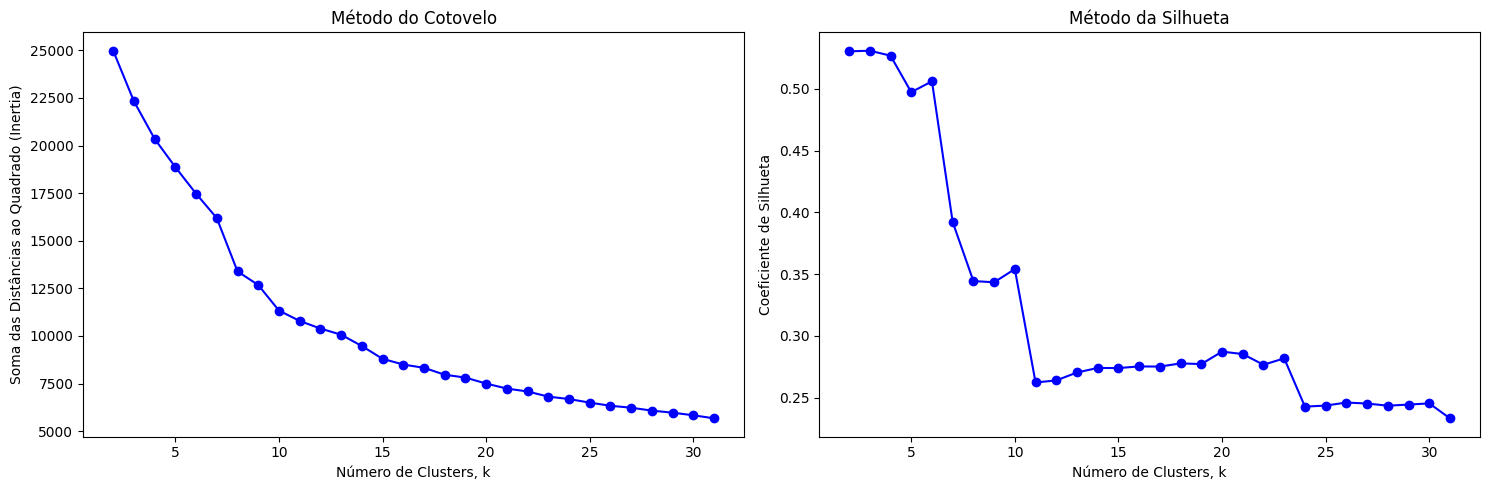

In [ ]:
# Intervalo de clusters para testar
range_n_clusters = range(2, 32)

# Listas para armazenar os valores de Inertia e Silhueta
results = []

# Testando cada número de clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calcular Inertia e Silhueta para cada número de clusters
    inertia_value = kmeans.inertia_
    silhouette_value = silhouette_score(X_scaled, cluster_labels)

    # Armazenar resultados em um dicionário
    results.append({
        'Número de Clusters': n_clusters,
        'Inércia': inertia_value,
        'Média da Silhueta': silhouette_value
    })

# Criar DataFrame para os resultados
results_df = pd.DataFrame(results)

# Criar uma figura com subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot do Método do Cotovelo
ax1.plot(results_df['Número de Clusters'], results_df['Inércia'], marker='o', color='blue')
ax1.set_xlabel('Número de Clusters, k')
ax1.set_ylabel('Soma das Distâncias ao Quadrado (Inertia)')
ax1.set_title('Método do Cotovelo')

# Plot do Coeficiente de Silhueta
ax2.plot(results_df['Número de Clusters'], results_df['Média da Silhueta'], marker='o', color='blue')
ax2.set_xlabel('Número de Clusters, k')
ax2.set_ylabel('Coeficiente de Silhueta')
ax2.set_title('Método da Silhueta')

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()


### **F) Classificação e Nomenclatura dos Candles**

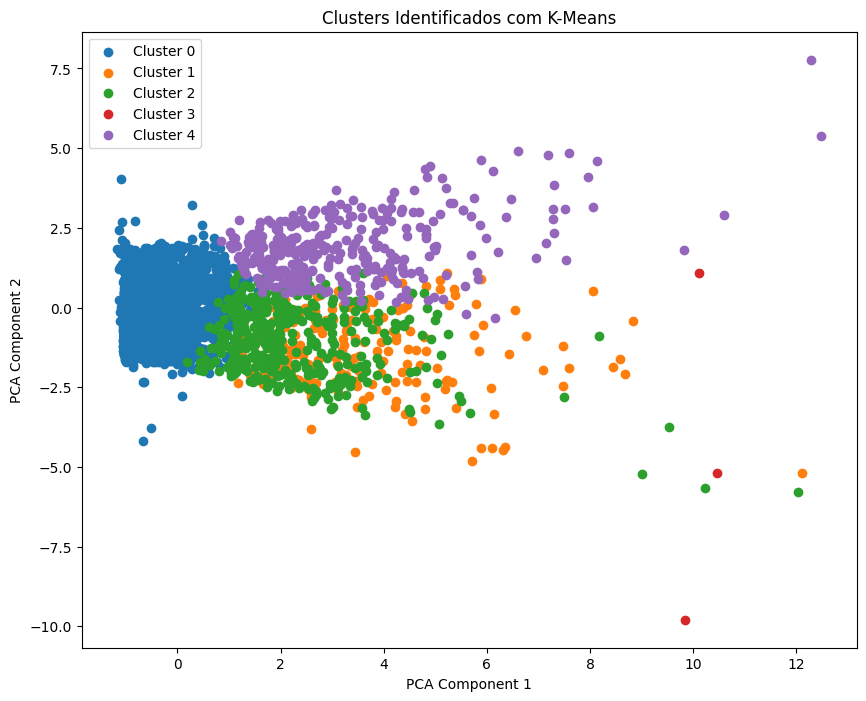

In [ ]:
# Defina o número de clusters com base nos resultados anteriores
n_clusters = 5  # Substitua pelo número definido

# Executar o K-Means com o número de clusters determinado
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualização dos clusters usando PCA para reduzir a dimensionalidade para 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adicionando componentes principais ao DataFrame para visualização
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot dos clusters
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Identificados com K-Means')
plt.legend()
plt.show()

In [ ]:
df.head()

,Open,High,Low,Close,Type,altura,corpo,sombra_superior,sombra_inferior,relacao_corpo_altura,razao_abertura_fechamento,gap,Cluster,PCA1,PCA2
Date,,,,,,,,,,,,,,,
2002-05-24,1.214286,1.225000,1.197143,1.210000,Bearish,0.027857,0.004286,0.010714,0.012857,0.153852,1.002951,0.017857,0,-1.038331,-0.940258
2002-05-28,1.213571,1.232143,1.157143,1.157143,Bearish,0.075000,0.056428,0.018572,0.000000,0.752363,1.006173,0.003571,0,-0.996348,0.944735
2002-05-29,1.164286,1.164286,1.085714,1.103571,Bearish,0.078572,0.060715,0.000000,0.017857,0.772721,1.003884,0.007143,0,-0.993200,0.993691
2002-05-30,1.107857,1.107857,1.071429,1.071429,Bearish,0.036428,0.036428,0.000000,0.000000,0.999973,1.006666,0.004286,0,-0.993854,1.716555
2002-05-31,1.078571,1.078571,1.071429,1.076429,Bearish,0.007142,0.002142,0.000000,0.005000,0.299874,1.003317,0.007142,0,-1.036944,-0.483089


In [ ]:
# Contar quantos elementos pertencem a cada cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Exibir o número de elementos em cada cluster
print("Número de elementos por cluster:")
print(cluster_counts)


Número de elementos por cluster:
Cluster
0    4065
1     224
2     400
3       3
4     350
Name: count, dtype: int64


### **G) Apresentação dos Resultados**

In [ ]:
# Suponha que o DataFrame 'df' já tenha as colunas 'Date', 'Open', 'High', 'Low', 'Close' e 'Cluster'
# Gerar uma paleta de cores automática com base no número de clusters
n_clusters = df['Cluster'].nunique()
cluster_colors = plt.cm.tab10(range(n_clusters))  # Escolhe uma paleta de 10 cores (ou ajuste conforme necessário)
cluster_colors = ['rgba({},{},{},1)'.format(int(r*255), int(g*255), int(b*255)) for r, g, b, _ in cluster_colors]

# Criar a figura do gráfico de candlestick
fig = go.Figure()

# Adicionar os candlesticks ao gráfico com as cores dos clusters
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    color = cluster_colors[cluster % len(cluster_colors)]
    fig.add_trace(go.Candlestick(
        x=cluster_data.index,
        open=cluster_data['Open'],
        high=cluster_data['High'],
        low=cluster_data['Low'],
        close=cluster_data['Close'],
        name=f'Cluster {cluster}',
        increasing_line_color=color,  # Cor para alta
        decreasing_line_color=color   # Cor para baixa
    ))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Candlesticks Classificados por Cluster',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

fig.show()


### **H) Avaliação da eficácia do modelo**

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Defina o número de últimos registros a serem exibidos
num_records = int(input("Insira o número de últimos registros que deseja exibir: "))

# Gerar uma paleta de cores automática com base no número de clusters
n_clusters = df['Cluster'].nunique()
cluster_colors = plt.cm.tab10(range(n_clusters))  # Escolhe uma paleta de 10 cores (ou ajuste conforme necessário)
cluster_colors = ['rgba({},{},{},1)'.format(int(r*255), int(g*255), int(b*255)) for r, g, b, _ in cluster_colors]

# Criar a figura do gráfico de candlestick
fig = go.Figure()

# Filtrar o DataFrame para pegar os últimos `num_records` registros
filtered_df = df.tail(num_records)

# Adicionar os candlesticks ao gráfico com as cores dos clusters, mas apenas para os últimos registros selecionados
for cluster in filtered_df['Cluster'].unique():
    # Filtrar dados para o cluster atual dentro do subconjunto dos últimos `num_records` registros
    cluster_data = filtered_df[filtered_df['Cluster'] == cluster]
    color = cluster_colors[cluster % len(cluster_colors)]

    # Adicionar candlesticks para o cluster atual
    fig.add_trace(go.Candlestick(
        x=cluster_data.index,
        open=cluster_data['Open'],
        high=cluster_data['High'],
        low=cluster_data['Low'],
        close=cluster_data['Close'],
        name=f'Cluster {cluster}',
        increasing_line_color=color,  # Cor para alta
        decreasing_line_color=color   # Cor para baixa
    ))

# Atualizar o layout do gráfico
fig.update_layout(
    title=f'Candlesticks Classificados por Cluster (Últimos {num_records} Registros)',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

fig.show()

Insira o número de últimos registros que deseja exibir: 30


## Conclusão

### Em resumo, a pureza é uma métrica útil para avaliar a qualidade da clusterização quando se tem dados rotulados, mesmo em contextos de clusterização não supervisionada. No entanto, seu uso é limitado à situação em que há uma referência de classe disponível e deve ser complementado por outras métricas para uma avaliação mais completa da estrutura dos dados.

## Lições aprendidas

A principal lição aprendida é que  a preparação é fundamental.  Entender os conceitos do que se quer representar com o gráfico de candlestick é mais importante do que a técnica que vamos utilizar.

Como dizia Einstein, "se eu tiver 1h para salvar o mundo vou gastar 55 minutos pensando no que fazer".

O essencial é  entender o que cada vela representa em termos de psicologia do mercado e poder interpreta-la de modo prático para classificar e para entender o que significa do ponto de vista do mercado e tendências.

Cada candlestick é uma representação visual da dinâmica entre compradores e vendedores, e para que funcione bem é preciso que as variáveis definidas a partir dos dados básicos sejam representativas do que vai se querer representar no final, por exemplo:

a)	O tamanho do corpo e das sombras pode mostrar a força relativa e a dinâmica de preço, quem controlou o preço, até que ponto. As velas de corpo longo indicam o controle por parte dos compradores (na alta) ou vendedores (na baixa). As sombras longas sugerem grande disputa, onde um dos lados tentou o domínio, mas foi repelido.

b)	A análise da sequência de velas de alta ou de baixa também pode nos dar uma boa ideia sobre a continuação ou reversão de tendências, portanto essa visualização no gráfico é importante.

c)	A observação de alguns tipos de candlesticks são bastante significativos quando ocorrem após movimentos fortes, pois podem significar alguma hesitação do mercado e um enfraquecimento da tendência.

d)	Os preços máximos e mínimos dos candlesticks revelam os níveis chamados de suporte e resistência dinâmicos, ou seja, onde os níveis em que o preço tende a recuar ou subir.

e)	Não temos dados sobre volume de negócios no exercício, então não dá para analisar esse aspecto, mas a visualização no gráfico de um padrão da vela seguinte mantendo um padrão de alta ou baixa é um indicador de que esse movimento pode ser mais confiável.

f)	O gráfico de candlestick deve também focar períodos temporais mais extensos ou mais curtos para permitir mais “peso” nas decisões ou mais refinamento para entradas e saídas do investimento.

g)	O tamanho das velas e das sombras também são variáveis importantes para serem mostradas no gráfico porque exprimem o sentimento de confiança ou incerteza do mercado. Velas grandes e consistentes mostram convicção, de otimismo ou pessimismo, e velas pequenas ou com sombras longas mostram dúvida e instabilidade.

Depois de pensar os “55min do Einstein” sobre esses conceitos, a lição sobre a abordagem técnica foi seguir o padrão geral nesses casos, ou seja, “preparação do dataset”, “exploração inicial”, “definição das variáveis”, “escolha do algoritmo”, “treinamento do modelo”, “atribuição de labels”, “geração do gráfico de candlesticks”, “avaliação da eficiência do modelo”.